In [1]:
import math
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection, LineCollection
import numpy
from PIL import Image, ImageDraw

<h1> Create Black and White Images </h1>

In [2]:
voxel_count_width = 100
image1 = Image.open('/Users/aloksaxena/Desktop/alok_1.png').convert('L').resize((voxel_count_width, voxel_count_width))
image2 = Image.open('/Users/aloksaxena/Desktop/alok_2.png').convert('L').resize((voxel_count_width, voxel_count_width))
image3 = Image.open('/Users/aloksaxena/Desktop/alok_3.png').convert('L').resize((voxel_count_width, voxel_count_width))

black_and_white_image_1 = np.rot90((np.array(image1) < 70).astype(int), 3)
black_and_white_image_2 = np.rot90((np.array(image2) < 120).astype(int), 2)
black_and_white_image_3 = np.rot90((np.array(image3) < 120).astype(int), 2)

<h1> Define cube dimensions and initialize cube matrix with trivial case </h1>

In [3]:
big_cube_side_length = 1
cube_side_length = big_cube_side_length / float(voxel_count_width)
cube_matrix = (np.random.rand(voxel_count_width, voxel_count_width, voxel_count_width) > 1.0).astype(int)
cube_matrix[:, :, 0] = black_and_white_image_1
cube_matrix[0, :, :] = black_and_white_image_2
cube_matrix[:, 0, :] = black_and_white_image_3


<h1> Define position of the camera </h1>

In [4]:
distance_from_camera_to_closest_face = 2.0
focal_length = 1.0
sensor_width = 1.0

<h1> Construct image from real world coordinates of cube matrix and camera parameters </h1>

<h1> Method for achieving this in a vectorized fashion </h1>

<h2> Get cube matrix voxel world coordinates </h2>

In [5]:
xv, yv, zv = np.meshgrid(np.arange(100), np.arange(100), np.arange(100))
cube_matrix_voxel_positions = np.stack([yv, xv, zv], axis=3)
cube_matrix_voxel_world_coordinates = np.zeros((voxel_count_width, voxel_count_width, voxel_count_width, 24))

# point 1
cube_matrix_voxel_world_coordinates[:,:,:,0] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,1] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,2] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width) * cube_side_length   

# point 2
cube_matrix_voxel_world_coordinates[:,:,:,3] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,4] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,5] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width) * cube_side_length

# point 3
cube_matrix_voxel_world_coordinates[:,:,:,6] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,7] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,8] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width) * cube_side_length

# point 4
cube_matrix_voxel_world_coordinates[:,:,:,9] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,10] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,11] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width) * cube_side_length

# point 5
cube_matrix_voxel_world_coordinates[:,:,:,12] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,13] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,14] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width + 1) * cube_side_length

# point 6
cube_matrix_voxel_world_coordinates[:,:,:,15] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,16] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,17] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width + 1) * cube_side_length

# point 7
cube_matrix_voxel_world_coordinates[:,:,:,18] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,19] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width + 1) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,20] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width + 1) * cube_side_length

# point 8
cube_matrix_voxel_world_coordinates[:,:,:,21] = (cube_matrix_voxel_positions[:,:,:,0] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,22] = (cube_matrix_voxel_positions[:,:,:,1] - 0.5 * voxel_count_width) * cube_side_length
cube_matrix_voxel_world_coordinates[:,:,:,23] = (cube_matrix_voxel_positions[:,:,:,2] - 0.5 * voxel_count_width + 1) * cube_side_length


<h2> Transform the voxel world coordinates based on camera position and orientation </h2>

In [6]:
def generate_rotation_matrix(rotation_x_axis, rotation_y_axis, rotation_z_axis):
    R_x = np.array([[1, 0, 0],
                    [0, math.cos(rotation_x_axis), -math.sin(rotation_x_axis)],
                    [0, math.sin(rotation_x_axis), math.cos(rotation_x_axis)]])
    
    R_y = np.array([[math.cos(rotation_y_axis), 0, math.sin(rotation_y_axis)],
                    [0, 1, 0],
                    [-math.sin(rotation_y_axis), 0, math.cos(rotation_y_axis)]])
    
    R_z = np.array([[math.cos(rotation_z_axis), -math.sin(rotation_z_axis), 0],
                    [math.sin(rotation_z_axis), math.cos(rotation_z_axis), 0],
                    [0, 0, 1]])
    
    R = np.dot(np.dot(R_x, R_y), R_z)
    return R
    
    

In [7]:
camera_position = (0, 0, -1.5)
distance_from_camera_to_closest_face = 2.0
focal_length = 1.0
sensor_width = 1.0
def get_cube_matrix_voxel_image_coordinates(rotation_x_axis, rotation_y_axis, rotation_z_axis):

    R = generate_rotation_matrix(rotation_x_axis, rotation_y_axis, rotation_z_axis)
    broadcasted_R = np.broadcast_to(R.T, (100,100,100,3,3)).T
    transformed_cube_matrix_voxel_world_coordinates = np.zeros((voxel_count_width, voxel_count_width, voxel_count_width, 24))
    for i in range(8):
        cube_matrix_section = cube_matrix_voxel_world_coordinates[:,:,:,3*i:3*(i+1)].T[:,np.newaxis,:,:,:]
        transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i:3*(i+1)] = np.squeeze(np.einsum('abcde,bfcde->afcde', broadcasted_R, cube_matrix_section).T)
        transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i] = transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i] - camera_position[0]
        transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i+1] = transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i+1] - camera_position[1]
        transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i+2] = transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i+2] - camera_position[2]

    cube_matrix_voxel_image_coordinates = np.zeros([voxel_count_width, voxel_count_width, voxel_count_width, 16])
    for i in range(8):
        cube_matrix_voxel_image_coordinates[:,:,:,2*i] = transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i] * focal_length / transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i+2]
        cube_matrix_voxel_image_coordinates[:,:,:,2*i+1] = transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i+1] * focal_length / transformed_cube_matrix_voxel_world_coordinates[:,:,:,3*i+2]
    cube_matrix_voxel_image_coordinates = cube_matrix_voxel_image_coordinates.reshape(100,100,100,8,2)
    return cube_matrix_voxel_image_coordinates




In [8]:
vic_1 = get_cube_matrix_voxel_image_coordinates(0, 0, 0)
vic_2 = get_cube_matrix_voxel_image_coordinates(0, -np.pi / 2.0, 0)
# vic_3 = get_cube_matrix_voxel_image_coordinates(np.pi / 2.0, 0, 0)
vic_3 = get_cube_matrix_voxel_image_coordinates(0, -np.pi / 4.0, 0)


In [120]:
vic_4 = get_cube_matrix_voxel_image_coordinates(np.pi / 4.0, 0, 0)
vic_5 = get_cube_matrix_voxel_image_coordinates(0, np.pi / 4.0, 0)

<h2> Get voxel image coordinates (polygons) for every single voxel (both perspectives) </h2>

<h1> Brute force three dimensional construction </h1>

<h3> Create template image </h3>

In [9]:
img_1 = Image.new('L', (1000, 1000), 0)
polygons_1 = []
total_area = 0.0
for x in range(voxel_count_width):
    for y in range(voxel_count_width):
        if black_and_white_image_1[x, y]:
            voxel_vertex_image_coordinates = vic_1[x,y,0,:,:]
            convex_hull = ConvexHull(voxel_vertex_image_coordinates)
            p = [tuple(k) for k in (convex_hull.points[convex_hull.vertices] * 1000 + 500).astype(int)]
            ImageDraw.Draw(img_1).polygon(p, outline=1, fill=1)

mask_1 = np.array(img_1)

In [10]:
img_2 = Image.new('L', (1000, 1000), 0)
polygons_2 = []
total_area = 0.0
for x in range(voxel_count_width):
    for y in range(voxel_count_width):
        if black_and_white_image_2[x, y]:
            voxel_vertex_image_coordinates = vic_2[0,x,y,:,:]
            convex_hull = ConvexHull(voxel_vertex_image_coordinates)
            p = [tuple(k) for k in (convex_hull.points[convex_hull.vertices] * 1000 + 500).astype(int)]
            ImageDraw.Draw(img_2).polygon(p, outline=1, fill=1)

mask_2 = np.array(img_2)

In [12]:
img_3 = Image.new('L', (1000, 1000), 0)
polygons_3 = []
total_area = 0.0
for x in range(voxel_count_width):
    for y in range(voxel_count_width):
        if black_and_white_image_3[x, y]:
            voxel_vertex_image_coordinates = vic_1[x,0,y,:,:]
            convex_hull = ConvexHull(voxel_vertex_image_coordinates)
            p = [tuple(k) for k in (convex_hull.points[convex_hull.vertices] * 1000 + 500).astype(int)]
            ImageDraw.Draw(img_3).polygon(p, outline=1, fill=1)

mask_3 = np.array(img_3)

<h1> Three sided attempt </h1>

In [13]:
img_1_current = Image.new('L', (1000, 1000), 0)
img_2_current = Image.new('L', (1000, 1000), 0)
img_3_current = Image.new('L', (1000, 1000), 0)
big_cube_side_length = 1
cube_side_length = big_cube_side_length / float(voxel_count_width)
cube_matrix = (np.random.rand(voxel_count_width, voxel_count_width, voxel_count_width) > 1.0).astype(int)

old_score_1, old_score_2, old_score_3 = 0, 0, 0
i = 0
while True:
    if i % 1000 == 0:
        print(i, cube_matrix.sum())
    if i > 500000:
        break
    i += 1
    x = int(np.random.uniform(100))
    y = int(np.random.uniform(100))
    z = int(np.random.uniform(100))
    
    voxel_vertex_image_coordinates_1 = vic_1[x, y, z, :, :]
    voxel_vertex_image_coordinates_2 = vic_2[x, y, z, :, :]
    voxel_vertex_image_coordinates_3 = vic_3[x, y, z, :, :]
    
    convex_hull_1 = ConvexHull(voxel_vertex_image_coordinates_1)
    p_1 = [tuple(k) for k in (convex_hull_1.points[convex_hull_1.vertices] * 1000 + 500).astype(int)]
    convex_hull_2 = ConvexHull(voxel_vertex_image_coordinates_2)
    p_2 = [tuple(k) for k in (convex_hull_2.points[convex_hull_2.vertices] * 1000 + 500).astype(int)]
    convex_hull_3 = ConvexHull(voxel_vertex_image_coordinates_3)
    p_3 = [tuple(k) for k in (convex_hull_3.points[convex_hull_3.vertices] * 1000 + 500).astype(int)]
    
    img_1_iter = img_1_current.copy()
    ImageDraw.Draw(img_1_iter).polygon(p_1, outline=1, fill=1)
    mask_1_current = np.array(img_1_iter)
    intersection_1 = (mask_1_current & mask_1).sum()
    invalid_1 = (mask_1_current & (1-mask_1)).sum()
    score_1 = intersection_1 - 2*invalid_1
    
    img_2_iter = img_2_current.copy()
    ImageDraw.Draw(img_2_iter).polygon(p_2, outline=1, fill=1)
    mask_2_current = np.array(img_2_iter)
    intersection_2 = (mask_2_current & mask_2).sum()
    invalid_2 = (mask_2_current & (1-mask_2)).sum()
    score_2 = intersection_2 - 2*invalid_2
    
    img_3_iter = img_3_current.copy()
    ImageDraw.Draw(img_3_iter).polygon(p_3, outline=1, fill=1)
    mask_3_current = np.array(img_3_iter)
    intersection_3 = (mask_3_current & mask_3).sum()
    invalid_3 = (mask_3_current & (1-mask_3)).sum()
    score_3 = intersection_3 - 2*invalid_3
    
    
    if (score_1 >= old_score_1) and (score_2 >= old_score_2) and (score_3 >= old_score_3):
        old_score_1 = score_1
        old_score_2 = score_2
        old_score_3 = score_3
        img_1_current = img_1_iter
        img_2_current = img_2_iter
        img_3_current = img_3_iter
        cube_matrix[x, y, z] = 1
    



(0, 0)
(1000, 21)
(2000, 40)
(3000, 55)
(4000, 69)
(5000, 85)
(6000, 103)
(7000, 121)
(8000, 135)
(9000, 145)
(10000, 153)
(11000, 182)
(12000, 193)
(13000, 207)
(14000, 222)
(15000, 237)
(16000, 252)
(17000, 263)
(18000, 277)
(19000, 288)
(20000, 301)
(21000, 312)
(22000, 319)
(23000, 329)
(24000, 342)
(25000, 350)
(26000, 362)
(27000, 373)
(28000, 385)
(29000, 398)
(30000, 407)
(31000, 419)
(32000, 431)
(33000, 443)
(34000, 459)
(35000, 476)
(36000, 488)
(37000, 498)
(38000, 519)
(39000, 533)
(40000, 544)
(41000, 559)
(42000, 573)
(43000, 576)
(44000, 585)
(45000, 596)
(46000, 617)
(47000, 628)
(48000, 639)
(49000, 649)
(50000, 659)
(51000, 664)
(52000, 669)
(53000, 674)
(54000, 688)
(55000, 702)
(56000, 709)
(57000, 718)
(58000, 727)
(59000, 740)
(60000, 746)
(61000, 760)
(62000, 769)
(63000, 773)
(64000, 789)
(65000, 798)
(66000, 810)
(67000, 819)
(68000, 830)
(69000, 843)
(70000, 853)
(71000, 868)
(72000, 880)
(73000, 889)
(74000, 899)
(75000, 907)
(76000, 922)
(77000, 930)
(78000

KeyboardInterrupt: 

In [226]:
xs = [0]*len(np.arange(0, 0.525, 0.025)) + list(np.arange(0, 0.525, 0.025))

In [227]:
ys = list(0.5 - np.arange(0, 0.525, 0.025)) + [0]*len(np.arange(0, 0.525, 0.025))

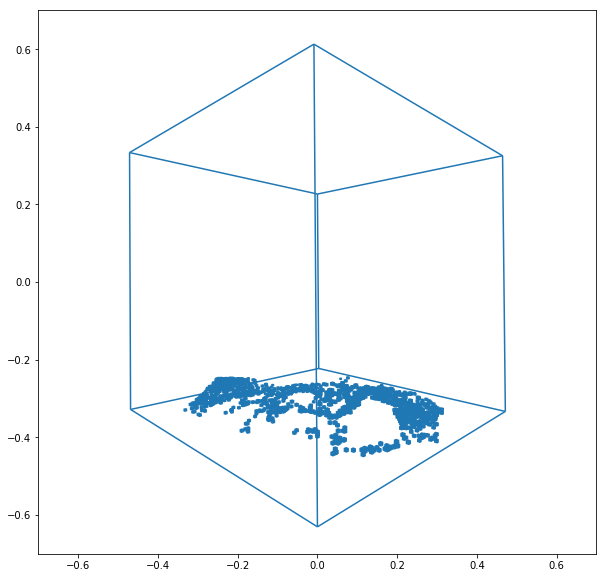

In [16]:
# for x, y in zip(xs, ys):
vic_5 = get_cube_matrix_voxel_image_coordinates(0, -np.pi / 4, 0)
vic = vic_5

p0 = vic[0,0,0,0,:]
p1 = vic[0,0,voxel_count_width-1,1,:]
p2 = vic[voxel_count_width-1,0,voxel_count_width-1,2,:]
p3 = vic[voxel_count_width-1,0,0,3,:]
p4 = vic[voxel_count_width-1,voxel_count_width-1,0,4,:]
p5 = vic[voxel_count_width-1,voxel_count_width-1,voxel_count_width-1,5,:]
p6 = vic[0,voxel_count_width-1,voxel_count_width-1,6,:]
p7 = vic[0,voxel_count_width-1,0,7,:]

lines = [
    [tuple(p0), tuple(p1)],
    [tuple(p1), tuple(p2)],
    [tuple(p2), tuple(p3)],
    [tuple(p3), tuple(p0)],
    [tuple(p0), tuple(p7)],
    [tuple(p1), tuple(p6)],
    [tuple(p2), tuple(p5)],
    [tuple(p3), tuple(p4)],
    [tuple(p4), tuple(p5)],
    [tuple(p5), tuple(p6)],
    [tuple(p6), tuple(p7)],
    [tuple(p7), tuple(p4)]
]


polygons = []
for x in range(voxel_count_width):
    for y in range(voxel_count_width):
        for z in range(voxel_count_width):
            if cube_matrix[x, y, z]:
                voxel_vertex_image_coordinates = vic[x,y,z,:,:]
                convex_hull = ConvexHull(voxel_vertex_image_coordinates)
                polygon = Polygon(convex_hull.points[convex_hull.vertices], True)
                polygons.append(polygon)


fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7)

p = PatchCollection(polygons, cmap=matplotlib.cm.jet, alpha=1.0)
l = LineCollection(lines)
ax.add_collection(p)
ax.add_collection(l)
plt.show()  

In [209]:
vic_4 = get_cube_matrix_voxel_image_coordinates(np.pi / 4.0, 0, 0)
vic_5 = get_cube_matrix_voxel_image_coordinates(0, -np.pi * 0.47, 0)

In [156]:
cube_matrix[cube_matrix > 0]

array([1, 1, 1, ..., 1, 1, 1])

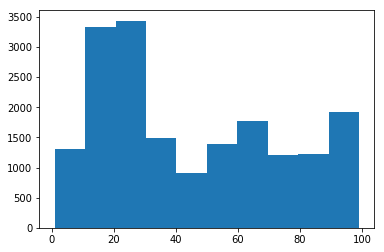

In [163]:
plt.hist(np.where(cube_matrix > 0)[0])
plt.show()